<a href="https://colab.research.google.com/github/ConradBitt/repositorio_monografia/blob/main/Mapa_linear_por_partes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurações, importações e instalações




In [1]:
# Versão Ubuntu
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


In [2]:
# Instalando fortran e gnuplot
!apt-get install gfortran
!apt-get install gnuplot

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aglfn gnuplot-data gnuplot-qt libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common liblua5.3-0 libnotify4 libqt5svg5
  libwxbase3.0-0v5 libwxgtk3.0-0v5 notification-daemon
Suggested packages:
  gnuplot-doc gvfs
The following NEW packages will be installed:
  aglfn gnuplot gnuplot-data gnuplot-qt libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common liblua5.3-0 libnotify4 libqt5svg5
  libwxbase3.0-0v5 libwxgtk3.0-0v5 notification-daemon
0 upgraded, 15 newly installed, 0 to remove and 39 not upgraded.
Need to get 8,565 kB of archives.
After this operation, 31.4 MB of additional disk space w

In [3]:
!pip install pyunicorn
!pip install statsmodels=='0.12.2'
!pip install scipy=='1.7.1'
!pip install numpy=='1.21.0'

     |████████████████████████████████| 881 kB 5.1 MB/s 
     |████████████████████████████████| 3.1 MB 45.1 MB/s 
  Created wheel for pyunicorn: filename=pyunicorn-0.6.1-cp37-cp37m-linux_x86_64.whl size=1100009 sha256=64f947cc35eed3dd504cb1b314ff55cdbff57c145f73457bc9ad39cb727e56de
  Stored in directory: /root/.cache/pip/wheels/ae/70/82/be70aa22a8a7e252435790be8e59f013c7e4f3da9ac8f0ff96
Successfully built pyunicorn
     |████████████████████████████████| 9.5 MB 5.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 28.5 MB 1.5 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the

In [5]:

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import ticker as tkr
from matplotlib import colors as mcolors
mpl.rcParams["axes.formatter.use_mathtext"] = True

import numpy as np 
import seaborn as sns
import pandas as pd
import IPython.display as IPythonNB

import scipy.stats as scipy_stats
from google.colab import drive
from scipy.stats import normaltest
from scipy.stats import hmean
import scipy.linalg as la
from pyunicorn.timeseries import RecurrenceNetwork, RecurrencePlot

from sklearn.preprocessing import MinMaxScaler, StandardScaler

semente = 1458513866
sns.set_context('talk')
plt.style.use('bmh')

cm = 1/2.54

drive.mount('/content/gdrive')

Mounted at /content/gdrive


### <b><font color='red'>AVISO</font></b>

Muitas vezes ao executar o PyUnicorn da um erro do tipo ``ModuleNotFoundError: No module named 'setup'``. Quando isso acontecer, e vai acontecer, entre no arquivo "/usr/local/lib/python3.7/dist-packages/pyunicorn/__init__.py" e comente a linha 43 onde esta escrito:
```python
from setup import __version__
```
adicione um # na linha

```python
#from setup import __version__
```
salve com Ctrl+S e reinicie o ambiente de execução indo em "Ambiente de execução" ---> "Reiniciar e executar tudo". 

Códigos Auxiliares

# Funções auxiliares

## Definindo funções auxiliares (python)


In [6]:
# função do formatador leva o rótulo do tick e a posição do tick 
def func(x, pos):
    s = str(np.round(x,2))
    ind = s.index('.')
    return s[:ind] + ',' + s[ind+1:]   # trocando ponto por vírgula

formatador = tkr.FuncFormatter(func)  # criando formatador


Nesta etapa vou criar algumas funções para realizar os cálculos e as exibições gráficas.

## Função para iterar mapa

In [7]:
def itera_mapa(f, x0, n):
    """
    Itera o mapa f(x) começando em x0 por n instantes de tempo.
    - f: função lambda a ser iterada.
    - x_0: condição inicial 
    - Precisão: 
    Retorna um numpy.array com n+1 valores x[0], ..., x[n].
    """
    x = np.zeros(n+1)
    x[0] = x0
    xt = Decimal(x0)
    for t in range(n):
        xt = f(xt)
        x[t+1] = xt
    return x

## Função para exibir Cobweb plot

In [8]:
def cobweb_plot(f, x_0, n_iteracoes, range_x, figsize, titulo='', legenda=False, labels_axis = ('x_t','x_{t+1}')):
    """
    Exibe Cobweb plot
    - f: funcao lambda a ser iterada
    - x_0: condição inicial
    - n_iteracoes: quantidade de passos (iteracoes)
    - eq_latex: string com equação em LaTeX
    - range_x: tupla com limite inferior e superior de x
    - figsize: tupla com comprimento X altura (em centimentros)

    return: (X,Y), figura
    """
    cm = 1/2.54
    figsize = (figsize[0]*cm, figsize[1]*cm)
    quantidade_iteracoes = n_iteracoes

    pontos = []
    pontos.append((x_0, f(x_0)))

    for iteracao in range(quantidade_iteracoes):
        x, y = pontos[-1]
        y = f(x)
        pontos.append((x,y))
        x = y 
        pontos.append((x,y))

    vetor_resultados = np.array(pontos).T
    X, Y = vetor_resultados

    axis_min, axis_max = range_x

    eixo = np.linspace(axis_min, axis_max, 100)
    f_x = np.array([f(x) for x in eixo])
    
    fig, ax = plt.subplots(figsize = figsize)
    ax.set_xlim(min(eixo), max(eixo))
    ax.set_ylim(min(eixo), max(eixo))
    ax.set_xlabel(f'${labels_axis[0]}$')
    ax.set_ylabel(f'${labels_axis[1]}$')

    ax.plot(eixo, eixo, linewidth=1, linestyle='--')
    ax.plot(eixo, f_x, color='green', label=r'$f(x)$')
    ax.hlines(y = 0, xmin=min(eixo), xmax = max(eixo), color='black', alpha=0.5)

    ax.plot(X[1:],Y[1:], color='blue', linewidth=0.5, label='Trajetória')
    ax.vlines(x_0, 0.0, Y[1], color='red', label='C.I.')
    ax.set_title(f'{titulo}', pad=20)
    
    if legenda:
      ax.legend(loc='upper left')

    #sns.histplot(np.array(Y), bins=50, ax=ax[1])
    #ax[1].set_title(r'Distribuição de $x_{n+1}$ ao longo das iterações', pad=20, fontsize=20)
    #ax[1].set_xlabel(r'$x_{n+1}$', fontsize=18)
    #ax[1].set_ylabel(r'Frequência', fontsize=18);

    # Formatando os pontos pra vírgula
    ax.yaxis.set_major_formatter(formatador)
    ax.xaxis.set_major_formatter(formatador)
    
    return vetor_resultados, fig

## Função para exibir Diagrama de Bifurcação

In [9]:
import random

def bifurcacao_plot(f, xs_0, n_iteracoes, r, titulo, figsize, linhas_verticais=False, labels_axis = ('r','x_{t+1}')):
    """
    Exibe diagrama de bifurcacao
    - f(x,r): função lambda a ser iterada (função lambda)
    - xs_0: lista de condições iniciais (CI's)(array)
    - n_iteracoes: quantidade de iterações (int)
    - r: espaço de parâmetros r (array)
    - titulo: string com título, $LaTeX$
    - figsize: tupla com comprimento X altura (em centimentros)

    return: (X_n, r), figura
    """
    cm = 1/2.54
    figsize = (figsize[0]*cm, figsize[1]*cm)

    resultados_bif = []
    for parametro_controle in r:
        x_0 = random.choice(xs_0) # Seleciona um valor das CI's
        x = itera_mapa(lambda x: f(x, Decimal(parametro_controle)),
                        Decimal(x_0), n_iteracoes)
        xn = x[-1]
        resultados_bif.append((xn, parametro_controle))

    resultados_bif = np.array(resultados_bif).T
    X_n_bif, espaco_r_bif = resultados_bif

    fig, ax = plt.subplots(figsize = figsize)

    ax.scatter(espaco_r_bif, X_n_bif, s=0.2, c='black')
    if linhas_verticais:
      i=0
      cores = ['blue','green','orange','red']
      for ponto in linhas_verticais:
        ax.vlines(ponto, min(X_n_bif)-1, max(X_n_bif)+1, color=f'{cores[i]}', label=f'({(string.ascii_uppercase[i])}) ${labels_axis[0]}={str(ponto).replace(".",",")}$')
        i += 1


    ax.legend()
    ax.set_ylim(min(X_n_bif), max(X_n_bif))
    ax.set_xlim(min(espaco_r_bif), max(espaco_r_bif))

    ax.set_ylabel(f'${labels_axis[1]}$', rotation=0)
    ax.set_xlabel(f'Parâmetro de controle ${labels_axis[0]}$')
    ax.set_title(f'{titulo}', pad=20)

    # Formatando os pontos pra vírgula
    ax.yaxis.set_major_formatter(formatador)
    ax.xaxis.set_major_formatter(formatador)

    return resultados_bif, fig


## Função para exibir Espectro de Lyapunov

In [10]:
from scipy.misc import derivative
import string


def expectro_lyapunov_plot(f, x_0, n_iteracoes, r, titulo, figsize, linhas_verticais=False, labels_axis = ('r','\lambda_r')):
    """
    Exibe o expectro de lyapunov
    - f(x,r): função lambda que representa o mapa
    - x_0: condição inicial da trajetória
    - n_iteracoes: quantidade de iterações do mapa
    - r: array com os parâmetros de controle 
    - titulo: string com equação escrita em LaTeX
    - figsize: tupla com comprimento X altura (em centimentros)

    return: (exp_lyap, r), figura
    """
    cm = 1/2.54
    figsize = (figsize[0]*cm, figsize[1]*cm)

    resultados_exp_lyap = []

    for parametro_controle in r:
        
        treajetoria_1 = itera_mapa(lambda x: f(x, Decimal(parametro_controle)),
                                   Decimal(x_0), n_iteracoes)
        
        exp_lyapunov = np.mean(np.log(np.abs([derivative(lambda x: f(x, parametro_controle), k, dx=1e-6) for k in treajetoria_1])))

        resultados_exp_lyap.append((exp_lyapunov, parametro_controle))

    resultados_exp_lyap = np.array(resultados_exp_lyap).T
    X_n_exp_lyap, espaco_r_exp_lyap = resultados_exp_lyap

    fig, ax = plt.subplots(figsize = figsize)
    ax.set_ylim(-1,max(X_n_exp_lyap))
    ax.set_xlim(min(r), max(r))
    #fig.set_size_inches(10, 8)

    ax.scatter(espaco_r_exp_lyap, X_n_exp_lyap, s=0.2, c='black')
    #plt.hlines(y=0.0, xmin=min(r),xmax=max(r),color='black', linewidth=0.5)
    ax.set_ylabel(f'${labels_axis[1]}$', rotation=0)
    ax.set_xlabel(f'Parâmetro de controle ${labels_axis[0]}$')
    ax.set_title(f'{titulo}', pad=20)

    if linhas_verticais:
      i=0
      cores = ['blue','green','orange','red']
      for ponto in linhas_verticais:
        ax.vlines(ponto, min(X_n_exp_lyap)-1, max(X_n_exp_lyap)+1, color=f'{cores[i]}', label=f'({(string.ascii_uppercase[i])}) ${labels_axis[0]}={str(ponto).replace(".",",")}$')
        i += 1

    ax.legend()
    
    # Formatando os pontos pra vírgula
    ax.yaxis.set_major_formatter(formatador)
    ax.xaxis.set_major_formatter(formatador)
  
    return resultados_exp_lyap, fig

# Funções de visualização

# Funções de visualização

In [11]:
def spatial_temporal(rede, iteracao=2000, periodo = 1, figsize=(12,10)):
    iteracoes_selecionadas = np.arange(1, rede.get_tempo(), periodo)
    fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(figsize[0]*cm, figsize[1]*cm))

    rede_filtrada = rede.get_spatial_temporal()[iteracoes_selecionadas].iloc[:,-100:].T[::-1]

    sns.heatmap(data = rede_filtrada, cmap='jet',
                cbar_kws={"format": formatador,'label': 'Estado $x_{t}^{i}$'},
                ax=ax)
    ax.set_title(f'$\sigma = {rede.get_sigma()}$', pad=20)
    ax.set_ylabel('Iteração $t$')
    ax.set_xlabel('Mapa $i$')
    
    return fig


In [12]:
def spatial_profile(rede, iteracao, figsize=(12,10)):
    fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(figsize[0]*cm, figsize[1]*cm))
    sns.scatterplot(data = rede.get_spatial_temporal().iloc[:,iteracao], ax=ax, s=30)
    ax.yaxis.set_major_formatter(formatador)
    ax.set_ylabel('Estado $x_t^i$')
    ax.set_xlabel('Mapa $i$')
    #ax.set_ylim(-1,1)
    ax.set_title(f'Perfil espacial na iteração {iteracao}', pad=20)
    return fig



In [13]:
def plot_recurrence_matrix(rede, iteracao=1998, figsize=(12,10)):
    iteracao = int(iteracao)
    fig, ax = plt.subplots(figsize=(figsize[0]*cm, figsize[1]*cm))
    img = ax.matshow(rede.get_matrix_recurrences_spatial()[iteracao],
                    vmin=0, vmax=1, cmap='binary')
            
    ax.set_ylabel(r'$ x_{t}^{i}$')
    ax.set_xlabel(r'$ x_{t}^{j}$')

    # Aspectos eixo 2
    caracteristica_mapa_rr = f'\t\t $\epsilon = 0,05$'
    sigma = str(rede.get_sigma()).replace('.',',')
    titulo_ax2 = f'$\sigma = {sigma} $'
    ax.set_title(titulo_ax2 + caracteristica_mapa_rr, pad=25)
    #cbar_ax = fig.add_axes([.90, 0.04, 0.04, 0.9]) 
    #fig.colorbar(img, cax=cbar_ax,label='Valor Matriz Recorrência', format=formatador)
    return fig

In [14]:
def comprimentos_matriz_rec(rede, iteracao, parametro):
    parametros = ['Prob_l','Prob_v', 'Prob_w']
    if parametro in parametros:
        dist = np.array(rede.get_params_recurence_analysis_spatial()[parametro][iteracao].replace('\n','').replace('  ',' ').replace('  ',' ').replace(' ',',').replace(',','',1)[1:-1].split(','))
        dist = pd.Series([int(i) for i in dist])
        return dist
    else:
        raise Exception(f'Escolha um parâmetro: {parametros}')
    

In [15]:
def freq_comprimento_matriz_recorrencia(rede, iteracao, parametro, n=35, figsize=(12,10)):
    if parametro == 'Prob_v':
        cor = 'green'
    elif parametro == 'Prob_l':
        cor = 'red'
    else:
        cor = 'blue'

    dist_fret_comprimento = comprimentos_matriz_rec(rede, iteracao, parametro).to_frame().reset_index()
    dist_fret_comprimento.columns = [f'comprimento_{parametro}','quantidade']

    fig, ax = plt.subplots(figsize=(figsize[0]*cm, figsize[1]*cm))
    sns.barplot(y = 'quantidade', x = f'comprimento_{parametro}', color=cor, data = dist_fret_comprimento.iloc[1:n])
    ax.set_ylabel(f'$P({parametro[-1]})$')
    ax.set_xlabel(f'Comprimento ${parametro[-1]}$')
    ax.set_title(f'$\sigma = {str(rede.get_sigma()).replace(".",",")}$')
    return fig


# Funções para iterar as redes

## Definindo função a ser iterada

# Linear por partes



In [16]:
from decimal import Decimal 
# parâmetros
p1 = -0.5
#l = 1.5
p2 = -2.4

# fuções lineares 


def linear_por_partes(x, l):
    x = float(x)
    l = float(l)
    
    f1 = lambda x : p1 * x + (p1 / l - 1) 
    f2 = lambda x : l * x 
    f3 = lambda x : p2 * x - (p2 / l - 1) 

    if -1 <= x < -1 / l:
        return f1(x)
    if -1 / l <= x < 1/l:
        return f2(x)
    if 1/l < x <= 1:
        return f3(x)

## Cobweb plot

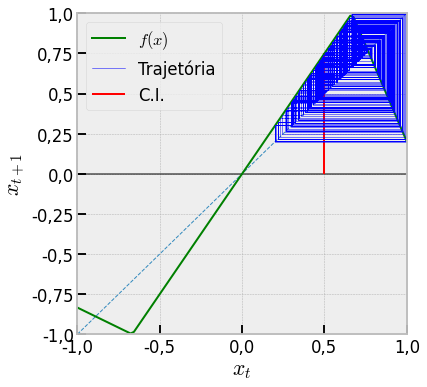

In [17]:
cobweb_picewise_27_positiv,fig_picewise_27_positiv = cobweb_plot(
    f = lambda x : linear_por_partes(x, 1.5),
    x_0 = 0.5,
    n_iteracoes = 250,
    range_x = (-1,1),
    figsize=(15,15),
     titulo='',
    legenda=True);

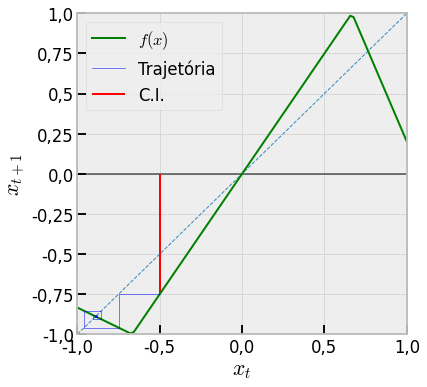

In [18]:
cobweb_picewise_27_negative, fig_picewise_27_negative = cobweb_plot(
    f = lambda x : linear_por_partes(x, 1.5),
    x_0 = -0.5,
    n_iteracoes = 250,
    range_x = (-1,1),
    figsize=(15,15), titulo='',
    legenda=True);

### Ponto Fixo

In [19]:
x_linear_picewise = itera_mapa(lambda x: linear_por_partes(x, 1.5), -0.2, 250)
ponto_fixo_picewise = x_linear_picewise[-1]
ponto_fixo_picewise

-0.8888888888888888

## Diagrama de Bifurcação

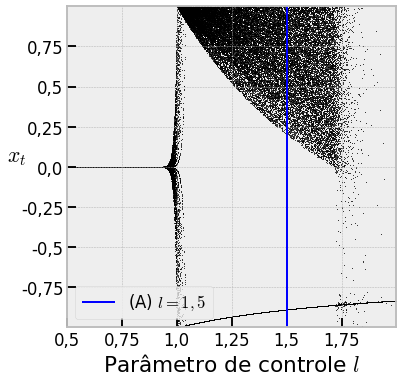

In [20]:
bif_picewise, fig_bif_picewise = bifurcacao_plot(
    f = linear_por_partes,
    xs_0 = np.linspace(-1,1.,50),
    n_iteracoes = 100,
    r = np.arange(0.5,2.,0.00001),
    titulo = '',
    figsize=(15,15),
    linhas_verticais= [1.5],
    labels_axis=('l','x_{t}')
    );


## Espectro de Lyapunov

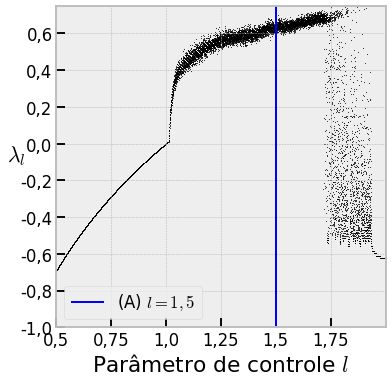

In [21]:
lyapu_picewise, fig_lyapu_picewise = expectro_lyapunov_plot(
    f = linear_por_partes,
    x_0 = 0.25,
    n_iteracoes = 100,
    r = np.arange(0.5,2.,0.0001, dtype=np.float64),
    titulo = '',
    figsize=(15,15),
    linhas_verticais= [1.5],
    labels_axis=('l','\lambda_{l}')
    );

                       

## Fixando l em $1.5$

`f` é uma função lambda que será utilizada nos mapas.

In [22]:
from decimal import Decimal 
# parâmetros
p1 = Decimal(-0.5)
l = Decimal(1.5)
p2 = Decimal(-2.4)

# fuções lineares 


def f(x):
    x = float(x)
    l = float(l)
    
    f1 = lambda x : p1 * x + (p1 / l - 1) 
    f2 = lambda x : l * x 
    f3 = lambda x : p2 * x - (p2 / l - 1) 

    if -1 <= x < -1 / l:
        return f1(x)
    if -1 / l <= x < 1/l:
        return f2(x)
    if 1/l < x <= 1:
        return f3(x)

# Criando uma classe que vai conter a rede

O objetivo dessa classe é criar uma rede de mapas com acoplamento não-local. O mapa que irá compor a rede deve ser passado como um parâmetro à classe, além das condições iniciais de cada mapa em um vetor `ci`, quantidade de iterações `tempo`, a intensidade de acoplamento `sigma`=$\sigma$ e o raio de influência `raio`=$r$.

In [23]:
class NonlocalCouplingNetwork():
    def __init__(self, ci, f, sigma, raio, tempo,
                 normalizar_matriz_rr=False, EPS = 0.03, FORTRAN = False):
        # Parametros da Rede
        self.__sigma = sigma
        self.__raio = raio
        self.__tempo = tempo
        self.__ci = ci
        self.__f = f

        #parametros da analise de quantificação de recorrência
        self.__normalizar_matriz_rr = normalizar_matriz_rr
        self.__EPS = EPS


        # criando um dataframe para armazenar os dados
        self.__rede = pd.DataFrame({},
                                   index=range(len(self.__ci)),
                                   dtype=np.float128)

        # Usando a iteração antiga como novas condições iniciais
        self.__rede[0] = self.__ci

        # Itera a rede
        if FORTRAN:
            self.__run_dynamic_fortran()
        else:
            self.__run_dynamic()
        # Velocidade
        self.__velocidade = self.__rede.diff(axis=1).iloc[:,1:]
        # Aceleracao
        self.__aceleracao = self.__velocidade.diff(axis=1).iloc[:,1:]

    def exec_recurrence_spatial_analysis(self, ti_map=1, tf_map=-1):
        self.__run_recurrence_spatial_analysis( ti_map, tf_map)

    def exec_recurrence_spatial_rate_analysis(self, ti_map=1, tf_map=-1):
        self.__run_recurrence_spatial_rate_analysis( ti_map,tf_map)


    # ================= Getters e Setters =============

    ## ================ Parametros de rede ============
    def get_sigma(self):
        """
        Retorna intensidade acoplamento sigma
        """
        return self.__sigma
    
    def get_raio(self):
        """
        Retorna raio de influencia dos elementos na rede
        """
        return self.__raio
    
    def get_tempo(self):
        """
        Retorna quantidade de tempos iterados
        """
        return self.__tempo

    ## Set para o fortran
    def __set_condicoes_iniciais_fortran(self):
        with open('condicoes_iniciais.dat', 'w') as arquivo:
            for i in self.__ci:
                arquivo.write(f'{i} ')

    def __set_parametros_rede(self):
        """
        Esta função define os parametros de rede 
        e salva num arquivo chamado 'tempo_sigma_raio.txt'
        para ser lido pelo fortran executar a rotina
        """  
        with open('parametros_rede.dat','w') as arquivo:
            arquivo.writelines(f'{self.__tempo}\n')
            arquivo.writelines(f'{self.__sigma}\n')
            arquivo.writelines(f'{self.__raio}\n')

    def __run_rotine_fortran(self):
        """
        Esta função compila e executa o código em fortran
        """
        ! gfortran "/content/gdrive/MyDrive/Classroom/TCC 2021 Conrado/codigos/fortran/linear_by_parts.f90" -o compilado.x
        ! ./compilado.x

    def __rede_fortran(self):
        """
        Atribui os dados mapa.dat como sendo o resultado da iteração da rede
        """
        self.__rede = pd.read_csv('/content/mapa.dat', sep='\s+', header=None).T


    ## ================= Redes ========================
    def get_spatial_temporal(self):
        """
        Retorna as posições nos tempos
        """
        return self.__rede
    
    def get_spatial_rate_temporal(self):
        """
        Retorna as velocidades nos tempos
        """
        return self.__velocidade


    ## ============= Análise de recorrência ===========
    
    def get_recurence_plot_spatial(self):
        """
        Retorna o objeto recurence plot posições
        """
        return self.__rp_spatial
    
    def get_recurence_plot_spatial_rate(self):
        """
        Retorna o objeto recurence plot velocidades
        """
        return self.__rp_spatial_rate

    
    def get_recurence_network_spatial(self):
        """
        Retorna o objeto recurence network das posições
        """
        return self.__rn_spatial

    def get_recurence_network_spatial_rate(self):
        """
        Retorna o objeto recurence network das velocidades
        """
        return self.__rn_spatial_rate


    def get_params_recurence_analysis_spatial(self):
        """
        Retorna parametros da analise de recorrencia da posição
        """
        return self.__params_ra_spatial

    def get_params_recurence_analysis_spatial_rate(self):
        """
        Retornaa parametros da analise de recorrencia da velocidade
        """
        return self.__params_ra_spatial_rate


    def get_matrix_recurrences_spatial(self):
        """
        Retorna um dicionario cuja chave é o tempo t de iteração
        e a chave é a matriz de recorrência da posição no tempo respectivo
        """
        return self.__matrix_recurrences_spatial

    def get_matrix_recurrences_spatial_rate(self):
        """
        Retorna um dicionario cuja chave é o tempo t de iteração
        e a chave é a matriz de recorrência da velocidade no tempo respectivo
        """
        return self.__matrix_recurrences_spatial_rate

    def get_spatial_matrices_bivariate_analysis(self):
        """
        Execute a função bivariate_analysis_spatial() antes deste get.
        - Retorna os autovalores, autovetores e os vetores de sinais das matrizes espaciais
        de acordo com a quantidade de k_autovetores selecionados na execução da 
        função bivariate_analysis_spatial

        return : autovalores, autovetores, vetor sinais
        """
        return self.__autovalores, self.__autovetores, self.__vetor_sinais

    def get_spatial_rate_matrices_bivariate_analysis(self):
        """
        Execute a função bivariate_analysis_spatial_rate() antes deste get.
        - Retorna os autovalores, autovetores e os vetores de sinais das matrizes da velocidade
        de acordo com a quantidade de k_autovetores selecionados na execução da 
        função bivariate_analysis_spatial
        """
        return self.__autovalores_velocidade, self.__autovetores_velocidade, self.__vetor_sinais_velocidade

    def describe_recurrence_analysis_spatial(self):
        """
        Retorna as estatisticas descritivas 
        dos parâmetros da analise de recorrência da posição
        """
        return self.__params_ra_spatial.describe()
    
    def describe_recurrence_analysis_spatial_rate(self):
        """
        Retorna as estatisticas descritivas 
        dos parâmetros da analise de recorrência da velocidade
        """
        return self.__params_ra_spatial_rate.describe()

    def dist_prob_lengths_spatial(self,):
        """
        Retorna um dicionario onde as chaves são as distribuições de probabilidade
        dos comprimentos na matriz de recorrência da posição.
        Cada valor é um DataFrame, cuja as colunas são as t-iterações

        prob_L = P(l)
        prob_V = P(v)
        prob_w = P(w)
        """
        return self.__dist_prob_comprimentos_spatial

    def dist_prob_lengths_spatial_rate(self,):
        """
        Retorna um dicionario onde as chaves são as distribuições de probabilidade
        dos comprimentos na matriz de recorrência da velocidade
        cada valor é um DataFrame, cuja as colunas são as t-iterações

        prob_L = P(l)
        prob_V = P(v)
        prob_w = P(w)
        """
        return self.__dist_prob_comprimentos_spatial_rate

    # ================= Métodos privados 

    ## ----------------- Funções de rede não local
    def __acoplamento_nao_local(self, posicoes_, posicao_, raio):
        """
        Calcula a distância entre a posição do indivíduo
        dentro do raio estipulado e retorna a distância.
        """
        self.__distancia = 0.0
        self.__i = int(posicao_)
        self.__P = int(self.__raio * len(posicoes_))
        for j in range(self.__i - self.__P, self.__i + self.__P):
            if j >= len(posicoes_):
                j = j - len(posicoes_)
            self.__distancia += posicoes_[j] - posicoes_[self.__i]

        return self.__distancia


    def __itera(self, f, x, sigma, raio):
        """
        Dada uma função f e um grupo de condições X
        Itera um passo a rede a partir de uma intensidade
        de acoplamento sigma e um raio de iteração.
        """
        #parametro vizinho
        self.__P = int(self.__raio * len(x))

        # atualiza os mapas
        self.__x = np.array([self.__f(i) for i in x])
        self.__xn = np.zeros_like(x)

        #Acoplamento
        for i in range(0, len(x)):
            self.__soma = self.__acoplamento_nao_local(self.__x, i, raio)
            self.__xn[i] = self.__x[i] + (self.__sigma / (2 * self.__P)) * self.__soma

        # Retorna o novo vetor
        return self.__xn

    def __recurrence_analysis(self, mapa):
        # Armazenar dados
        self.__params_recurence_analysis = {
        'Recurrence_rate':[],
        'Determinism':[],
        'Laminarity': [],
        'Average_diag_length':[],
        'Average_vert_length':[],
        'Average_white_vert_length':[],
        'Prob_l': [],
        'Prob_v': [],
        'Prob_w': [],
        'diag_entropy': [],
        'vert_entropy': [],
        'white_vert_entropy': [],
        'divergence_diag':[],
        'divergence_vert':[],
        'divergence_white_vert':[],
        #'Average_path_length' : [],
        #'Transitivity' : [],
        #'Global_clustering' : [],
        #'Assortativity' : []
        }

        # DataFrame para armazenar os valores dos parâmetros de recorrência
        self.__params_recurence_analysis = pd.DataFrame(
            self.__params_recurence_analysis, dtype = np.float64
            )

        # Dicionário para armazenar as matrizes de recorrência em cada iteração
        self.__matrix_recurrences = {}

        # Dicionários para armazenar as distribuições de probabilidade
        self.__prob_L = pd.DataFrame({})
        self.__prob_V = pd.DataFrame({})
        self.__prob_W = pd.DataFrame({})

        self.__entropy_diag = pd.DataFrame({})
        self.__entropy_vert = pd.DataFrame({})
        self.__entropy_white_vert = pd.DataFrame({})

        # Parametros RecurrencePlot
        DIM = 1  # Embedding dimension
        TAU = 0  # Embedding delay
        # Métricas disponíveis manhattan, euclidean, supremum
        METRIC = 'euclidean'

        for t in range(len(mapa.columns)):
            self.__rp = RecurrencePlot(mapa.iloc[:,t].to_numpy(),
                                       dim=DIM, tau=TAU, metric=METRIC,
                                       normalize=self.__normalizar_matriz_rr,
                                       threshold=self.__EPS)
            RR = self.__rp.recurrence_rate()
            DET = self.__rp.determinism(l_min=2)
            LAM = self.__rp.laminarity(v_min=2)
            DL = self.__rp.average_diaglength(l_min=2)
            TT = self.__rp.average_vertlength(v_min=2)
            TT_white = self.__rp.average_white_vertlength(w_min = 2)
            prob_l = self.__rp.diagline_dist()
            prob_v = self.__rp.vertline_dist()
            prob_w = self.__rp.white_vertline_dist()
            diag_entropy = self.__rp.diag_entropy()
            vert_entropy = self.__rp.vert_entropy()
            white_vert_entropy = self.__rp.white_vert_entropy()
            divergence_diag = 1 / (self.__rp.max_diaglength())
            divergence_vert = 1 / (self.__rp.max_vertlength())
            divergence_white_vert = 1 / (self.__rp.max_white_vertlength())

            self.__matrix_recurrences[t] = self.__rp.recurrence_matrix()


            self.__rn = RecurrenceNetwork(mapa.iloc[:,t].to_numpy(),
                                          dim=DIM, tau=TAU, metric=METRIC,
                                          normalize=self.__normalizar_matriz_rr,
                                          recurrence_rate=RR,
                                          threshold=self.__EPS
                                          )

            #L = self.__rn.average_path_length()
            #T = self.__rn.transitivity()
            #C = self.__rn.global_clustering()
            #R = self.__rn.assortativity()

            self.__params_recurence_analysis.loc[t, 'Recurrence_rate'] = RR
            self.__params_recurence_analysis.loc[t, 'Determinism'] = DET
            self.__params_recurence_analysis.loc[t, 'Laminarity'] = LAM
            self.__params_recurence_analysis.loc[t, 'Average_diag_length'] = DL
            self.__params_recurence_analysis.loc[t, 'Average_vert_length'] = TT
            self.__params_recurence_analysis.loc[t, 'Average_white_vert_length'] = TT_white
            self.__params_recurence_analysis.loc[t, 'Prob_l'] = str(prob_l)
            self.__params_recurence_analysis.loc[t, 'Prob_v'] = str(prob_v)
            self.__params_recurence_analysis.loc[t, 'Prob_w'] = str(prob_w)
            self.__params_recurence_analysis.loc[t, 'diag_entropy'] = diag_entropy
            self.__params_recurence_analysis.loc[t, 'vert_entropy'] = vert_entropy
            self.__params_recurence_analysis.loc[t, 'white_vert_entropy'] = white_vert_entropy
            self.__params_recurence_analysis.loc[t, 'divergence_diag'] = divergence_diag
            self.__params_recurence_analysis.loc[t, 'divergence_vert'] = divergence_vert
            self.__params_recurence_analysis.loc[t, 'divergence_white_vert'] = divergence_white_vert
            #self.__params_recurence_analysis.loc[t, 'Average_path_length'] = L
            #self.__params_recurence_analysis.loc[t, 'Transitivity'] = T
            #self.__params_recurence_analysis.loc[t, 'Global_clustering'] = C
            #self.__params_recurence_analysis.loc[t, 'Assortativity'] = R

            ### ATENÇÃO: ADICIONARL UM NP.MEAN(PROB_L/V/W)
            #self.__prob_L[t] = prob_l
            #self.__prob_V[t] = prob_v
            #self.__prob_W[t] = prob_w

            self.__entropy_diag[t] = [self.__rp.diag_entropy(k) for k in range(100)]
            self.__entropy_vert[t] = [self.__rp.vert_entropy(k) for k in range(100)]
            self.__entropy_white_vert[t] = [self.__rp.white_vert_entropy(k) for k in range(100)]

        self.__dist_prob_comprimentos = {'prob_L' : self.__prob_L,
                                         'prob_V' : self.__prob_V,
                                         'prob_W' : self.__prob_W,
                                         'entropy_diag': self.__entropy_diag,
                                         'entropy_vert': self.__entropy_vert,
                                         'entropy_white_vert': self.__entropy_white_vert,
                                         }
        # Limpando output
        IPythonNB.clear_output(wait=False)
        return self.__params_recurence_analysis, self.__matrix_recurrences, self.__rp, self.__rn, self.__dist_prob_comprimentos

    def bivariate_analysis(self, matriz_recorrencia, k_autovetores = 0):
        """
        Calcula os autovalores e autovetores de uma matriz de recorrência espacial

        - Se k_autovetores = 0 realiza a soma de todos os autovetores cujo autovalores
        são maiores que 1.
        - Se k_autovetores = 5, soma os 5 autovetores cujo autovalores
        são maiores que 1.

        return: autovals, autovec, sign_vec
        """
        #autovalores, autovetores = la.eigh(matriz_recorrencia, driver='evd', lower=True)
        autovalores, autovetores = la.eigh(matriz_recorrencia, driver='evd', lower=False)
        autovalores_sr = pd.Series(np.round(autovalores,4))
        autovetores_df = pd.DataFrame(np.round(autovetores,4))

        if k_autovetores != 0:
            autovalores_selecionados = autovalores_sr[autovalores_sr > 1.].sort_values()
            k_autovalores_selecionados = autovalores_selecionados.iloc[-k_autovetores:]
            indice = k_autovalores_selecionados.index
            autovetores_selecionados = autovetores_df[indice].T
            soma_autovetores_selecionados = abs(autovetores_df[indice].T).sum()
            vetor_sinais = np.array([1 if x > 0 else 0 for x in soma_autovetores_selecionados])

            return autovalores_sr, autovetores_selecionados, vetor_sinais
        else:
            autovalores_selecionados = autovalores_sr[autovalores_sr > 1.]
            indice = autovalores_selecionados.index
            autovetores_selecionados = autovetores_df[indice].T
            soma_autovetores_selecionados = abs(autovetores_df[indice].T).sum()
            vetor_sinais = np.array([1 if x > 0 else 0 for x in soma_autovetores_selecionados])

            return autovalores_sr, autovetores_selecionados, vetor_sinais


    def __bivariate_analysis(self, matriz_recorrencia, k_autovetores = 0):
        """
        Calcula os autovalores e autovetores de uma matriz de recorrência espacial

        - Se k_autovetores = 0 realiza a soma de todos os autovetores cujo autovalores
        são maiores que 1.
        - Se k_autovetores = 5, soma os 5 autovetores cujo autovalores
        são maiores que 1.
        """
        #autovalores, autovetores = la.eigh(matriz_recorrencia, driver='evd', lower=True)
        autovalores, autovetores = la.eigh(matriz_recorrencia, driver='evd', lower=False)
        autovalores_sr = pd.Series(np.round(autovalores,4))
        autovetores_df = pd.DataFrame(np.round(autovetores,4))

        if k_autovetores != 0:
            autovalores_selecionados = autovalores_sr[autovalores_sr > 1.]
            k_autovalores_selecionados = autovalores_selecionados.iloc[-k_autovetores:]
            indice = k_autovalores_selecionados.index
            autovetores_selecionados = abs(autovetores_df[indice].T).sum()
            vetor_sinais = np.array([1 if x > 0 else 0 for x in autovetores_selecionados])

            return autovalores_sr, autovetores_selecionados, vetor_sinais
        else:
            autovalores_selecionados = autovalores_sr[autovalores_sr > 1.]
            indice = autovalores_selecionados.index
            autovetores_selecionados = abs(autovetores_df[indice].T).sum()
            vetor_sinais = np.array([1 if x > 0 else 0 for x in autovetores_selecionados])

            return autovalores_sr, autovetores_selecionados, vetor_sinais        

    def bivariate_analysis_spatial(self, k_autovetores):
        """
        É importante ter executado a função exec_recurrence_spatial_analysis()
        antes de excutar esta função.
        Realiza o cálculo dos autovalores e autovetores das matrizes de recorrência
        O vetor de sinais é a soma dos k primeiros autovetores no espectro de autovetores.

        :: return autovalores, autovetores, vetor_sinais 
        """
        autovalores = {}
        autovetores = {}
        vetor_sinais = {}

        for iteracao in self.get_matrix_recurrences_spatial().keys():
            autoval, autovet, vetor_s = self.__bivariate_analysis(self.get_matrix_recurrences_spatial()[iteracao],k_autovetores)

            autovalores[iteracao] = autoval
            autovetores[iteracao] = autovet
            vetor_sinais[iteracao] = vetor_s
        
        self.__autovalores = pd.DataFrame(autovalores)
        self.__autovetores = pd.DataFrame(autovetores)
        self.__vetor_sinais = pd.DataFrame(vetor_sinais)

        return self.__autovalores, self.__autovetores, self.__vetor_sinais

    def bivariate_analysis_spatial_rate(self, k_autovetores):
        """
        É importante ter executado a função exec_recurrence_spatial_analysis()
        antes de excutar esta função.
        Realiza o cáluclo dos autovalores e autovetores das matrizes de recorrência
        O vetor de sinais é a soma dos k primeiros autovetores no espectro de autovetores.

        :: return autovalores, autovetores, vetor_sinais 
        """
        autovalores = {}
        autovetores = {}
        vetor_sinais = {}

        for iteracao in self.get_matrix_recurrences_spatial().keys():
            autoval, autovet, vetor_s = self.bivariate_analysis(self.get_matrix_recurrences_spatial_rate()[iteracao],k_autovetores)

            autovalores[iteracao] = autoval
            autovetores[iteracao] = autovet
            vetor_sinais[iteracao] = vetor_s

        self.__autovalores_velocidade = pd.DataFrame(autovalores)
        self.__autovetores_velocidade = pd.DataFrame(autovetores)
        self.__vetor_sinais_velocidade = pd.DataFrame(vetor_sinais)

        return self.__autovalores_velocidade, self.__autovetores_velocidade, self.__vetor_sinais_velocidade


    def __run_dynamic(self):
        """
        Função que itera mapa. Recebe um vetor com as CI
        Itera em t_iterações a rede com intensidade sigma e raio r
        Retorna uma tabela com os dados iterados
        """
        # Iterando a rede
        for t in range(self.__tempo):
            self.__rede[t+1] = self.__itera(self.__f, self.__rede[t], self.__sigma, self.__raio)

    def __run_dynamic_fortran(self):
        self.__set_condicoes_iniciais_fortran()
        self.__set_parametros_rede()
        self.__run_rotine_fortran()
        self.__rede_fortran()

    def __run_recurrence_spatial_analysis(self, ti_map, tf_map):
        self.__params_ra_spatial, self.__matrix_recurrences_spatial, self.__rp_spatial, self.__rn_spatial, self.__dist_prob_comprimentos_spatial = self.__recurrence_analysis(self.__rede.iloc[:,ti_map:tf_map])
        return self.__params_ra_spatial, self.__matrix_recurrences_spatial, self.__rp_spatial, self.__rn_spatial, self.__dist_prob_comprimentos_spatial

    def __run_recurrence_spatial_rate_analysis(self, ti_map, tf_map):
        self.__params_ra_spatial_rate, self.__matrix_recurrences_spatial_rate, self.__rp_spatial_rate, self.__rn_spatial_rate, self.__dist_prob_comprimentos_spatial_rate = self.__recurrence_analysis(self.__velocidade.iloc[:,ti_map:tf_map])
        return self.__params_ra_spatial_rate, self.__matrix_recurrences_spatial_rate, self.__rp_spatial_rate, self.__rn_spatial_rate, self.__dist_prob_comprimentos_spatial_rate

    # ================= Métodos de exibição 

    ## ---------------- Posição
    def plot_spatial_temporal(self, ti_map=-20, tf_map=-1, t_sp = -1, periodo = None, vmin_map=None, vmax_map=None, cmap='jet'):
        """
        Exibe um plot da evolução espacial da rede.

        Os parametros "ti_map" e "tf_map" servem para escolher o range
        de exibição do mapa espaço-temporal.

        O parâmetro "t_sp" é o tempo da disposição espacial dos elementos.
        """
        caracteristica_rede = f'$\sigma = {self.__sigma}$ \t $r={self.__raio}$\n'

        spatial_temporal, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))

        sns.scatterplot(x = self.__rede.iloc[:,t_sp].index,
                        y = self.__rede.iloc[:,t_sp], ax=ax1)
        ax1.set_title('Arranjo espacial dos elementos\n na ultima iteração',
                    fontsize=20, pad=30)
        ax1.set_xlabel('Elemento $i$', fontsize=18)
        ax1.set_ylabel('Posição $X_{t}^{i}$', fontsize=18)
        ax1.set(ylim=(vmin_map, vmax_map))

        if periodo:
            iteracoes_selecionadas = np.arange(1, self.__tempo, periodo)
            sns.heatmap(self.__rede[iteracoes_selecionadas].iloc[:,ti_map:tf_map].T[::-1], ax=ax2,
                        cmap=cmap, vmin=vmin_map, vmax=vmax_map, 
                        cbar_kws={"format": formatador})
        else:
            sns.heatmap(self.__rede.iloc[:,ti_map:tf_map].T[::-1], ax=ax2,
                        cmap=cmap, vmin=vmin_map, vmax=vmax_map, 
                        cbar_kws={"format": formatador})
        ax2.set_title(f'Evolução espaço temporal \n{caracteristica_rede}')
        ax2.set_ylabel('Iteração $t$', fontsize=18)
        ax2.set_xlabel('Elemento $X^i$', fontsize=18)

        # Formatando os pontos pra vírgula
        ax1.yaxis.set_major_formatter(formatador)

        return spatial_temporal

    

#Instanciando as redes 


## Definindo as condições iniciais

### Aleatórias

In [24]:
# semente = 1458513866
np.random.seed(semente) 

# Testando outra semente
#np.random.seed(1458513861)
x = np.random.random(100)

condicoes_aleatorias = pd.Series(2*x-1)
condicoes_aleatorias

condicoes_senoidais = np.array([np.sin((i*2*np.pi)/(100)) for i in range(100)])
condicoes_cossenoidais = np.array([np.cos((i*2*np.pi)/(100)) for i in range(100)])

condicoes_senoidais_inv = np.array([-1*np.sin((i*2*np.pi)/(100)) for i in range(100)])
condicoes_cossenoidais_inv = np.array([-1*np.cos((i*2*np.pi)/(100)) for i in range(100)])

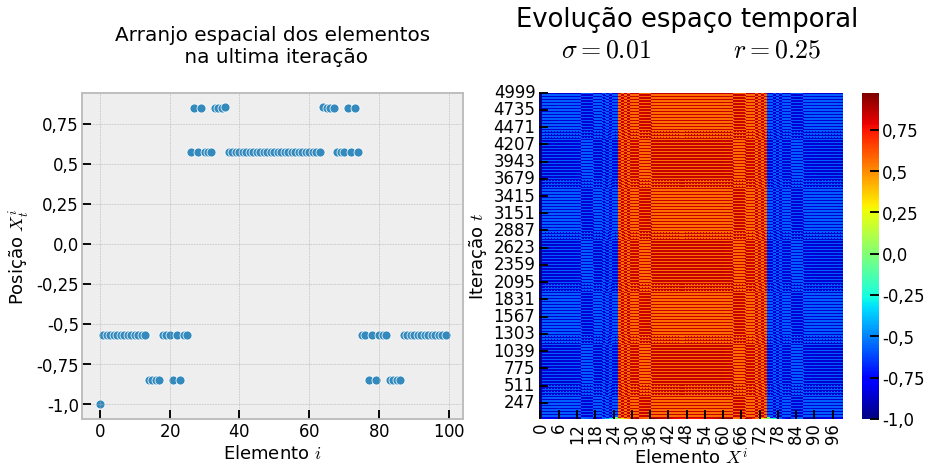

In [25]:
rede_geradora_condicoes_iniciais = NonlocalCouplingNetwork(condicoes_cossenoidais_inv, f, sigma=0.01, raio=0.25, tempo = 5001, FORTRAN=True)
rede_geradora_condicoes_iniciais.plot_spatial_temporal(ti_map=1, cmap='jet');
condicoes_iniciais_apartir_rede = rede_geradora_condicoes_iniciais.get_spatial_temporal()[5000]

# Criando Redes

Abaixo criamos 5 redes com acoplamento não-local.
O rótulo da variável é:
> `nlcoupling_sigma_raio`.
 

In [26]:
nlcoupling_s000_r25 = NonlocalCouplingNetwork(condicoes_aleatorias, f, sigma=0.00, raio=0.25, tempo = 20020, FORTRAN=True, EPS=0.05)
nlcoupling_s020_r25 = NonlocalCouplingNetwork(condicoes_aleatorias, f, sigma=0.20, raio=0.25, tempo = 20020, FORTRAN=True, EPS=0.05)
nlcoupling_s0307_r25 = NonlocalCouplingNetwork(condicoes_aleatorias, f, sigma=0.307, raio=0.25, tempo = 20020, FORTRAN=True, EPS=0.05)
nlcoupling_s040_r25 = NonlocalCouplingNetwork(condicoes_aleatorias, f, sigma=0.40, raio=0.25, tempo = 20020, FORTRAN=True, EPS=0.05)
nlcoupling_s057_r25 = NonlocalCouplingNetwork(condicoes_aleatorias, f, sigma=0.57, raio=0.25, tempo = 20020, FORTRAN=True, EPS=0.05)

# Exibição espaço-temporal e perfil espacial

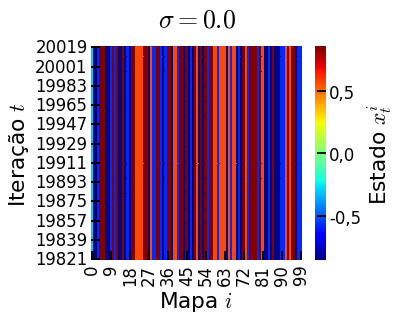

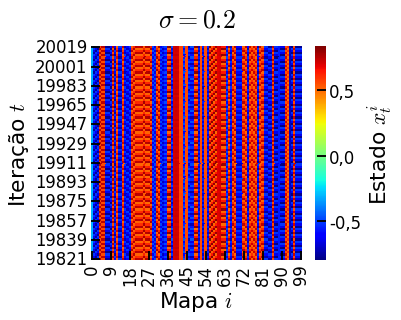

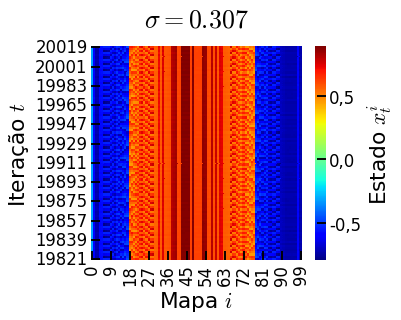

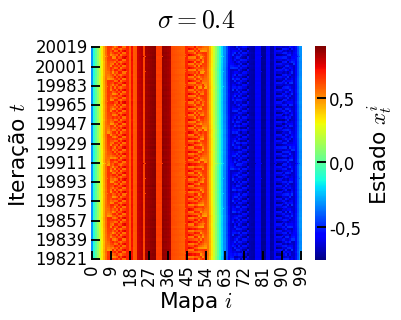

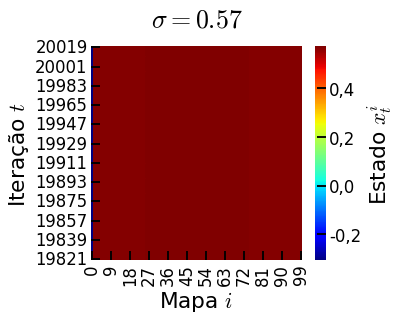

In [27]:
spatial_temporal(nlcoupling_s000_r25, periodo=2);
spatial_temporal(nlcoupling_s020_r25, periodo=2);
spatial_temporal(nlcoupling_s0307_r25, periodo=2);
spatial_temporal(nlcoupling_s040_r25, periodo=2);
spatial_temporal(nlcoupling_s057_r25, periodo=2);

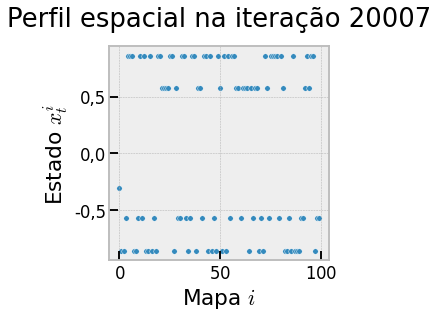

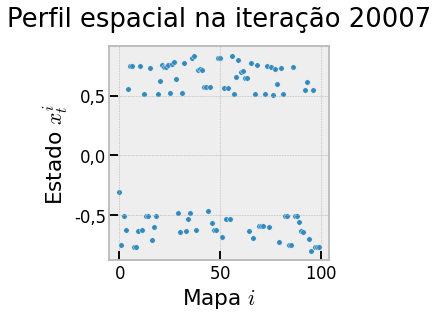

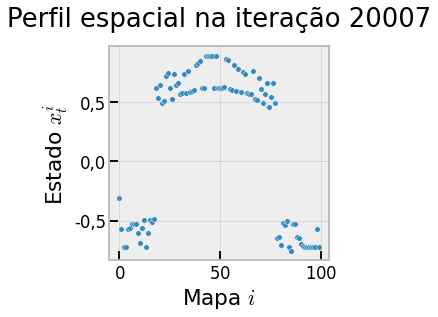

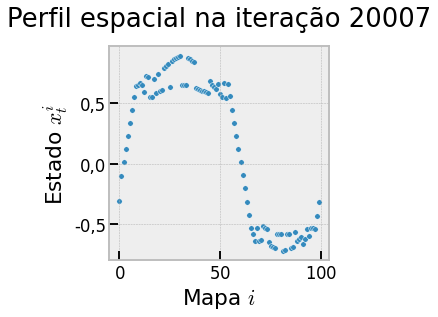

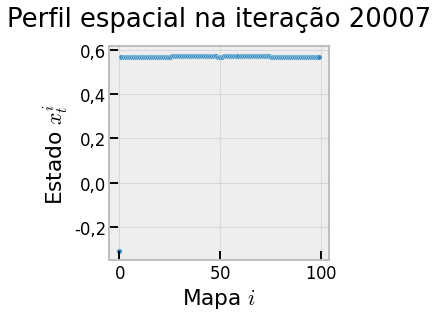

In [28]:
spatial_profile(nlcoupling_s000_r25, 20007, figsize=(10,10));
spatial_profile(nlcoupling_s020_r25, 20007, figsize=(10,10));
spatial_profile(nlcoupling_s0307_r25, 20007, figsize=(10,10));
spatial_profile(nlcoupling_s040_r25, 20007, figsize=(10,10));
spatial_profile(nlcoupling_s057_r25, 20007, figsize=(10,10));

# Analise de quantificação de recorrência espacial


In [29]:
nlcoupling_s000_r25.exec_recurrence_spatial_analysis(ti_map=-2000)
nlcoupling_s020_r25.exec_recurrence_spatial_analysis(ti_map=-2000)
nlcoupling_s0307_r25.exec_recurrence_spatial_analysis(ti_map=-2000)
nlcoupling_s040_r25.exec_recurrence_spatial_analysis(ti_map=-2000)
nlcoupling_s057_r25.exec_recurrence_spatial_analysis(ti_map=-2000)


In [30]:
#rqa_params_005 = nlcoupling_s005_r32.get_params_recurence_analysis_spatial()[['Recurrence_rate', 'Determinism', 'Laminarity']]
#rqa_params_025 = nlcoupling_s025_r32.get_params_recurence_analysis_spatial()[['Recurrence_rate', 'Determinism', 'Laminarity']]
#rqa_params_037 = nlcoupling_s037_r32.get_params_recurence_analysis_spatial()[['Recurrence_rate', 'Determinism', 'Laminarity']]
#rqa_params_075 = nlcoupling_s075_r32.get_params_recurence_analysis_spatial()[['Recurrence_rate', 'Determinism', 'Laminarity']]

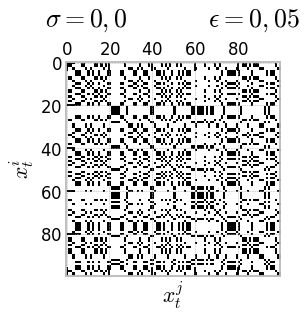

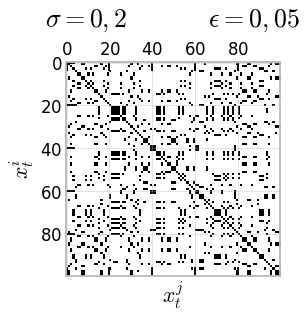

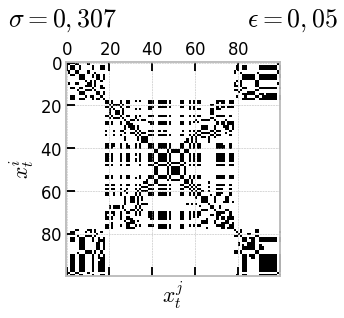

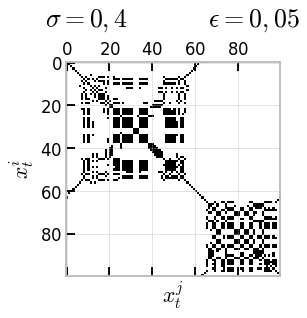

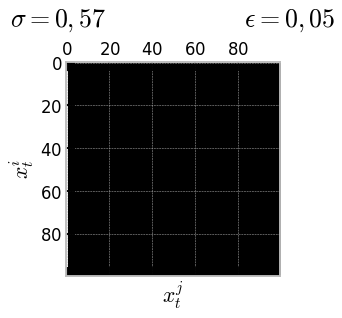

In [31]:
plot_recurrence_matrix(nlcoupling_s000_r25, iteracao=100, figsize=(12,10));
plot_recurrence_matrix(nlcoupling_s020_r25, iteracao=100, figsize=(12,10));
plot_recurrence_matrix(nlcoupling_s0307_r25, iteracao=100, figsize=(12,10));
plot_recurrence_matrix(nlcoupling_s040_r25, iteracao=100, figsize=(12,10));
plot_recurrence_matrix(nlcoupling_s057_r25, iteracao=100, figsize=(12,10));

In [32]:
def plot_REQA_line(rede, periodo,figsize=(12,10), t_i=1600):
    tf = len(rede.get_params_recurence_analysis_spatial())
    iteracoes_selecionadas = np.arange(t_i, tf, periodo)
    rqa_params = rede.get_params_recurence_analysis_spatial()[['Recurrence_rate', 'Determinism', 'Laminarity']].iloc[iteracoes_selecionadas,:]
    fig, ax = plt.subplots(figsize=(figsize[0]*cm, figsize[1]*cm))
    
    sns.lineplot(data=rqa_params['Recurrence_rate'], color='blue', label='$RR$', linewidth=0.9)
    sns.lineplot(data=rqa_params['Determinism'], color='red', label='$DET$', linewidth=0.8)
    sns.lineplot(data=rqa_params['Laminarity'], color='green', label='$LAM$', linewidth=0.9)
    
    ax.set_ylim(0,1.05)
    #ax.set_title(f'${str(rede.get_sigma()).replace(".",",")}$')
    ax.set_ylabel('')
    ax.set_xlabel('iteração t')
    plt.legend(loc='upper right')
    ax.yaxis.set_major_formatter(formatador)
    
    return fig

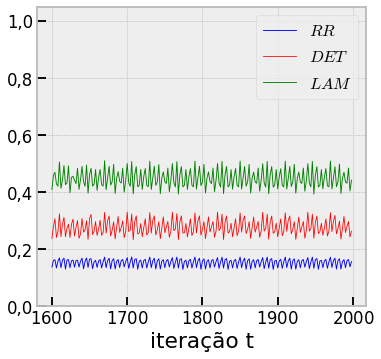

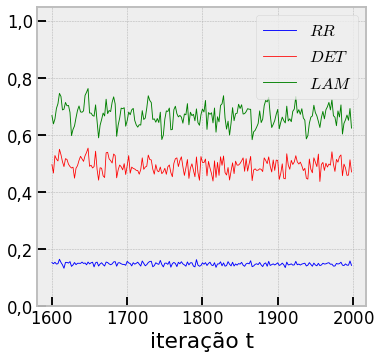

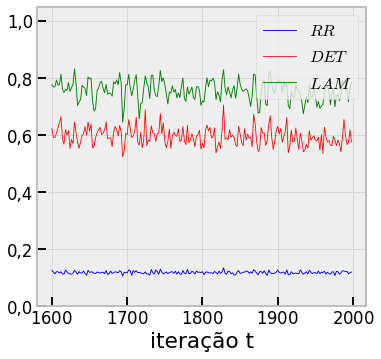

In [33]:
#plot_REQA_line(nlcoupling_s000_r25, periodo=2, figsize=(15,14));
plot_REQA_line(nlcoupling_s020_r25, periodo=2, figsize=(15,14));
plot_REQA_line(nlcoupling_s0307_r25, periodo=2, figsize=(15,14));
plot_REQA_line(nlcoupling_s040_r25, periodo=2, figsize=(15,14));
#plot_REQA_line(nlcoupling_s057_r25, periodo=2, figsize=(15,14));

> A 𝑣-ésima entrada de 𝑃(𝑣) contém o número de linhas verticais de comprimento 𝑣.

In [34]:
#freq_comprimento_matriz_recorrencia(nlcoupling_s005_r32, 1998, 'Prob_v', n=30, figsize=(20,4));
#freq_comprimento_matriz_recorrencia(nlcoupling_s025_r32, 1998, 'Prob_v', n=30, figsize=(20,4));
#freq_comprimento_matriz_recorrencia(nlcoupling_s037_r32, 1998, 'Prob_v', n=30, figsize=(20,4));

In [35]:
def plot_REQA_hist(rede, periodo, parametros = [], figsize=(12,10), t_i=1000):
    iteracoes_selecionadas = np.arange(t_i, len(rede.get_params_recurence_analysis_spatial()), periodo)
    rqa_params = rede.get_params_recurence_analysis_spatial()[['Recurrence_rate', 'Determinism', 'Laminarity']].iloc[iteracoes_selecionadas,:]
    fig, ax = plt.subplots(figsize=(figsize[0]*cm, figsize[1]*cm))
    sns.histplot(data=rqa_params, x = 'Recurrence_rate',bins=24, binwidth=0.01, ax=ax, color='blue', label='$RR$', stat='count')
    sns.histplot(data=rqa_params, x = 'Determinism',bins=24, binwidth=0.01, ax=ax, color='red', label='$DET$', stat='count')
    sns.histplot(data=rqa_params, x = 'Laminarity',bins=24, binwidth=0.01, ax=ax, color='green', label='$LAM$', stat='count')

    sigma = str(rede.get_sigma()).replace('.',',')

    ax.set_xlim(-0.05,1.05)
    ax.set_title(f'$\sigma = {sigma}$')
    ax.set_ylabel('Contagem')
    ax.set_xlabel('Valor do parâmetro')
    ax.xaxis.set_major_formatter(formatador)
    plt.legend(loc='upper left')
    
    return fig

def plot_REQA_hist_average(rede, periodo, parametros = []):
    iteracoes_selecionadas = np.arange(1000, len(rede.get_params_recurence_analysis_spatial()), periodo)
    rqa_params = rede.get_params_recurence_analysis_spatial()[['Average_diag_length','Average_vert_length']].iloc[iteracoes_selecionadas,:].round(2)
    fig, ax = plt.subplots()
    sns.histplot(data=rqa_params, x = 'Average_diag_length', ax=ax, color='red', label='Avg diag length', stat='count')
    sns.histplot(data=rqa_params, x = 'Average_vert_length', ax=ax, color='green', label='Avg vert length', stat='count')
    #ax.set_xlim(-0.05,1.05)
    ax.set_title(f'${rede.get_sigma():.2f}$')
    ax.set_ylabel('Contagem')
    ax.set_xlabel('Valor do parâmetro')
    ax.xaxis.set_major_formatter(formatador)
    plt.legend()
    
    return fig

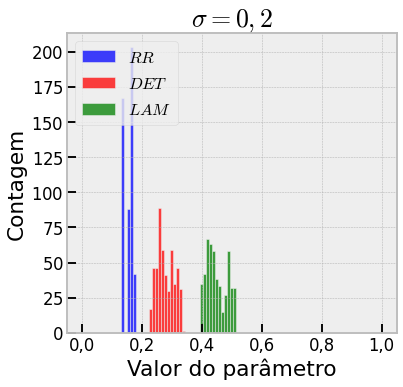

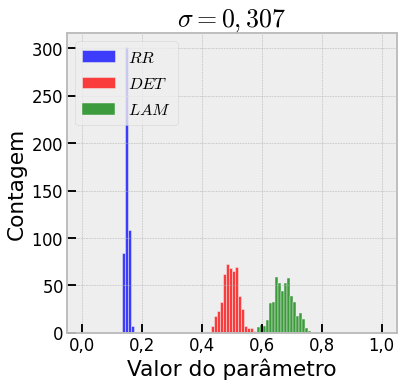

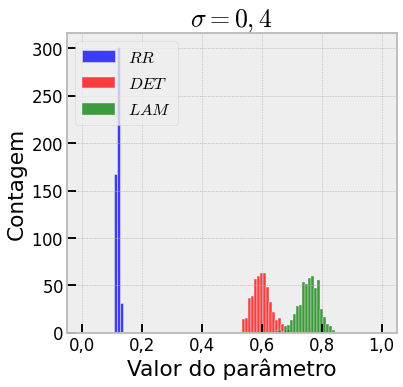

In [36]:
#plot_REQA_hist(nlcoupling_s000_r25, periodo=2);
plot_REQA_hist(nlcoupling_s020_r25, periodo=2, figsize=(15,14));
plot_REQA_hist(nlcoupling_s0307_r25, periodo=2,figsize=(15,14));
plot_REQA_hist(nlcoupling_s040_r25, periodo=2, figsize=(15,14));
#plot_REQA_hist(nlcoupling_s057_r25, periodo=2);

# espaço de parâmetros

In [37]:
sigmas = np.arange(0.02, 0.52,0.01)
sigmas

array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12,
       0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23,
       0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34,
       0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45,
       0.46, 0.47, 0.48, 0.49, 0.5 , 0.51])

In [38]:
raios = np.arange(0.02, 0.52,0.02)
raios

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 ])

In [39]:
print('Quantidade de redes:', len(sigmas) * len(raios))

Quantidade de redes: 1250


In [40]:
taxas_recorrencia = pd.DataFrame({})
determinismos = pd.DataFrame({})
laminaridades = pd.DataFrame({})

taxas_recorrencia_std = pd.DataFrame({})
determinismos_std = pd.DataFrame({})
laminaridades_std = pd.DataFrame({})

In [41]:
%%time

#for sigma in sigmas:
    #for raio in raios:
        #rede = NonlocalCouplingNetwork(condicoes_iniciais_apartir_rede, f, sigma=sigma, raio=raio, tempo = 20020, FORTRAN=True, EPS=0.05)
        #rede.exec_recurrence_spatial_analysis(ti_map=-400)

        #resultado_mean = rede.get_params_recurence_analysis_spatial()[['Recurrence_rate','Determinism','Laminarity']].mean(axis=0)
        #taxas_recorrencia.loc[f'{raio:.2f}', f'{sigma:.2f}'] = resultado_mean.Recurrence_rate
        #determinismos.loc[f'{raio:.2f}', f'{sigma:.2f}'] = resultado_mean.Determinism
        #laminaridades.loc[f'{raio:.2f}', f'{sigma:.2f}'] = resultado_mean.Laminarity

        #resultado_std = rede.get_params_recurence_analysis_spatial()[['Recurrence_rate','Determinism','Laminarity']].std(axis=0)
        #taxas_recorrencia_std.loc[f'{raio:.2f}', f'{sigma:.2f}'] = resultado_std.Recurrence_rate
        #determinismos_std.loc[f'{raio:.2f}', f'{sigma:.2f}'] = resultado_std.Determinism
        #laminaridades_std.loc[f'{raio:.2f}', f'{sigma:.2f}'] = resultado_std.Laminarity


CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 10.7 µs


## Salvando Objeto

In [42]:
import pickle

# Salvando objeto

## ================== MEDIA =============
#with open('/content/gdrive/MyDrive/Classroom/TCC 2021 Conrado/codigos/linear_por_partes_taxas_recorrencia.pkl', 'wb') as file:
    #pickle.dump(taxas_recorrencia, file)

#with open('/content/gdrive/MyDrive/Classroom/TCC 2021 Conrado/codigos/linear_por_partes_determinismos.pkl', 'wb') as file:
    #pickle.dump(determinismos, file)

#with open('/content/gdrive/MyDrive/Classroom/TCC 2021 Conrado/codigos/linear_por_partes_laminaridades.pkl', 'wb') as file:
    #pickle.dump(laminaridades, file)

## ===================== STD =================
#with open('/content/gdrive/MyDrive/Classroom/TCC 2021 Conrado/codigos/linear_por_partes_taxas_recorrencia_std.pkl', 'wb') as file:
    #pickle.dump(taxas_recorrencia_std, file)

#with open('/content/gdrive/MyDrive/Classroom/TCC 2021 Conrado/codigos/linear_por_partes_determinismos_std.pkl', 'wb') as file:
    #pickle.dump(determinismos_std, file)

#with open('/content/gdrive/MyDrive/Classroom/TCC 2021 Conrado/codigos/linear_por_partes_laminaridades_std.pkl', 'wb') as file:
    #pickle.dump(laminaridades_std, file)



In [43]:
# Abrindo um objeto salvo
arq_taxa_recorrencia = open('/content/gdrive/MyDrive/Classroom/TCC 2021 Conrado/codigos/linear_por_partes_taxas_recorrencia.pkl', 'rb')
taxas_recorrencia = pickle.load(arq_taxa_recorrencia)

arq_determinismos = open('/content/gdrive/MyDrive/Classroom/TCC 2021 Conrado/codigos/linear_por_partes_determinismos.pkl', 'rb')
determinismos = pickle.load(arq_determinismos)

arq_laminaridades = open('/content/gdrive/MyDrive/Classroom/TCC 2021 Conrado/codigos/linear_por_partes_laminaridades.pkl', 'rb')
laminaridades = pickle.load(arq_laminaridades)

arq_taxa_recorrencia_std = open('/content/gdrive/MyDrive/Classroom/TCC 2021 Conrado/codigos/linear_por_partes_taxas_recorrencia_std.pkl', 'rb')
taxas_recorrencia_std = pickle.load(arq_taxa_recorrencia_std)

arq_determinismos_std = open('/content/gdrive/MyDrive/Classroom/TCC 2021 Conrado/codigos/linear_por_partes_determinismos_std.pkl', 'rb')
determinismos_std = pickle.load(arq_determinismos_std)

arq_laminaridades_std = open('/content/gdrive/MyDrive/Classroom/TCC 2021 Conrado/codigos/linear_por_partes_laminaridades_std.pkl', 'rb')
laminaridades_std = pickle.load(arq_laminaridades_std)



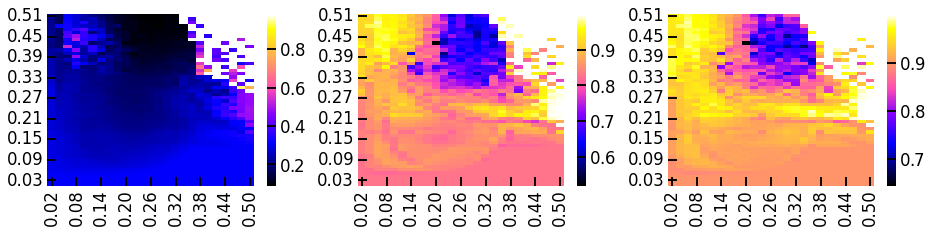

In [44]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(40*cm, 8 * cm))

sns.heatmap(data = taxas_recorrencia.T[::-1], cmap='gnuplot2', ax=ax[0])
sns.heatmap(data = determinismos.T[::-1], cmap='gnuplot2', ax=ax[1])
sns.heatmap(data = laminaridades.T[::-1], cmap='gnuplot2', ax=ax[2])

In [45]:
def plot_espaco_parametros(rr, det, lam, label_cbar):

    fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(45*cm, 10 * cm))

    rr.columns = [str(x).replace('.', ',') for x in rr.columns]
    rr.index = [str(x).replace('.', ',') for x in rr.index]

    det.columns = [str(x).replace('.', ',') for x in det.columns]
    det.index = [str(x).replace('.', ',') for x in det.index]

    lam.columns = [str(x).replace('.', ',') for x in lam.columns]
    lam.index = [str(x).replace('.', ',') for x in lam.index]


    sns.heatmap(data = rr.T[::-1], cmap='CMRmap', ax=ax[0],
                #vmin=lam.min().min(), vmax=lam.max().max(),
                cbar_kws={"format": formatador, 'label': label_cbar})
    sns.heatmap(data = det.T[::-1], cmap='CMRmap', ax=ax[1],
                #vmin=lam.min().min(), vmax=lam.max().max(),
                cbar_kws={"format": formatador, 'label': label_cbar})
    sns.heatmap(data = lam.T[::-1], cmap='CMRmap', ax=ax[2],
                #vmin=lam.min().min(), vmax=lam.max().max(),
                cbar_kws={"format": formatador, 'label': label_cbar})

    ax[0].set_title('$RR$', fontsize=20,pad=20)
    ax[1].set_title('$DET$', fontsize=20,pad=20)
    ax[2].set_title('$LAM$', fontsize=20,pad=20)

    ax[0].set_ylabel('$\sigma$', fontsize=20,rotation=0, labelpad=20)
    ax[0].set_xlabel('$r$', fontsize=20)
    ax[1].set_xlabel('$r$', fontsize=20)
    ax[2].set_xlabel('$r$', fontsize=20)
    

    return fig

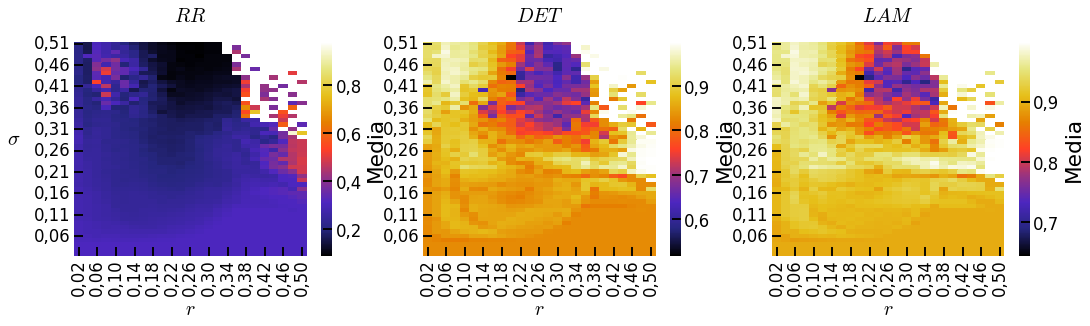

In [46]:
plot_espaco_parametros(
    taxas_recorrencia,
    determinismos,
    laminaridades,
    'Media'
);

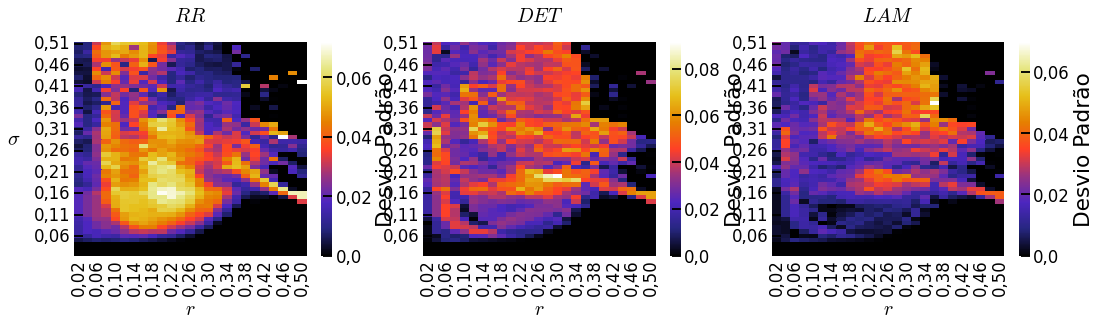

In [47]:
plot_espaco_parametros(
    taxas_recorrencia_std,
    determinismos_std,
    laminaridades_std,
    'Desvio Padrão'
);

# Análise de Autovalores, Autovetores e vetor de sinais

In [48]:
def bivariate_analysis(matriz_recorrencia, k_autovetores = 0, tolerancia = 0.05):
        """
        Calcula os autovalores e autovetores de uma matriz de recorrência espacial

        - Se k_autovetores = 0 realiza a soma de todos os autovetores cujo autovalores
        são maiores que 1.
        - Se k_autovetores = 5, soma os 5 autovetores cujo autovalores
        são maiores que 1.
        """
        autovalores, autovetores = la.eigh(matriz_recorrencia, driver='evd', lower=True)
        #autovalores, autovetores = la.eigh(matriz_recorrencia, driver='evd', lower=False)
        autovalores_sr = pd.Series(autovalores)
        autovetores_df = pd.DataFrame(autovetores)

        if k_autovetores != 0:
            autovalores_selecionados = autovalores_sr[autovalores_sr > 1.].sort_values()
            k_autovalores_selecionados = autovalores_selecionados.iloc[-k_autovetores:]
            indice = k_autovalores_selecionados.index
            autovetores_selecionados = abs(autovetores_df[indice])
            soma_autovetores_selecionados = abs(autovetores_df[indice]).sum(axis=1)
            vetor_sinais = np.array([1 if x > tolerancia else 0 for x in soma_autovetores_selecionados])

            return autovalores_sr, autovetores_selecionados, vetor_sinais
        else:
            autovalores_selecionados = autovalores_sr[autovalores_sr > 1.]
            indice = autovalores_selecionados.index
            autovetores_selecionados = abs(autovetores_df[indice])
            soma_autovetores_selecionados = abs(autovetores_df[indice]).sum(axis=1)
            vetor_sinais = np.array([1 if x > tolerancia else 0 for x in soma_autovetores_selecionados])

            return autovalores_sr, autovetores_selecionados, vetor_sinais

In [49]:
def plot_Bivariate(rede, iteracao, k_autovalores = 1, tolerancia = 0.05):
    sns.set_context('talk')
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25*cm,25*cm))
    fig.tight_layout(pad=2.5)

    matriz_rec = rede.get_matrix_recurrences_spatial()[iteracao]

    img = ax[0][0].matshow(matriz_rec, vmin=0, vmax=1, cmap='binary')
    ax[0][0].tick_params(axis="x", bottom=False, top=True, labelbottom=True, labeltop=False)
    #ax[0][0].set_title('Matriz de Recorrência Espacial', pad=15)
    ax[0][0].set_ylabel('$x^{i}$',rotation=0, fontsize=25, labelpad=20)
    ax[0][0].set_xlabel('$x^{j}$', fontsize=25)
    ax[0][0].grid(False)
    ax[0][0].set_title('(A)', fontsize=20, pad=7)

    e_k, v_k, s =  bivariate_analysis(matriz_rec,k_autovetores = k_autovalores,
                                      tolerancia=tolerancia)

    labels_legends = [r'[$\vec{v}_{'+f'{vetor+1}'+r'}$]' for vetor in range(k_autovalores)]

    sns.scatterplot(data = e_k, color='red', ax=ax[0][1])
    ax[0][1].set_ylabel('$e_k$',fontsize=25, labelpad=15, rotation=0)
    ax[0][1].set_xlabel('$k$', fontsize=20)
    ax[0][1].set_title('(B)', fontsize=20, pad=7)
    
    for coluna in v_k.columns:
        sns.scatterplot(y = v_k[coluna].values, x = v_k.index,  ax=ax[1][0])

    ax[1][0].legend(labels=labels_legends, loc='center right')
    ax[1][0].set_ylabel(r'[$\vec{v_k}$]', rotation=0, labelpad=20)
    ax[1][0].set_xlabel(r'Componente $i$ do autovetor $k$',fontsize=14)
    ax[1][0].set_title('(C)', fontsize=20, pad=7)
    ax[1][0].yaxis.set_major_formatter(formatador)

    sns.scatterplot(data = s, ax=ax[1][1], color='green', label=r'[$\vec{S}_{i}$]')
    ax[1][1].legend(title = f'$C_{k_autovalores} = {sum(s)}$')
    ax[1][1].set_ylabel(r'[$\vec{S}$]', rotation=0, labelpad=20)
    ax[1][1].set_xlabel(r'Componente $i$ do vetor de sinais $\vec{S}$',fontsize=14)
    ax[1][1].set_title('(D)', fontsize=20, pad=7)
    ax[1][1].yaxis.set_major_formatter(formatador)

    

    return fig

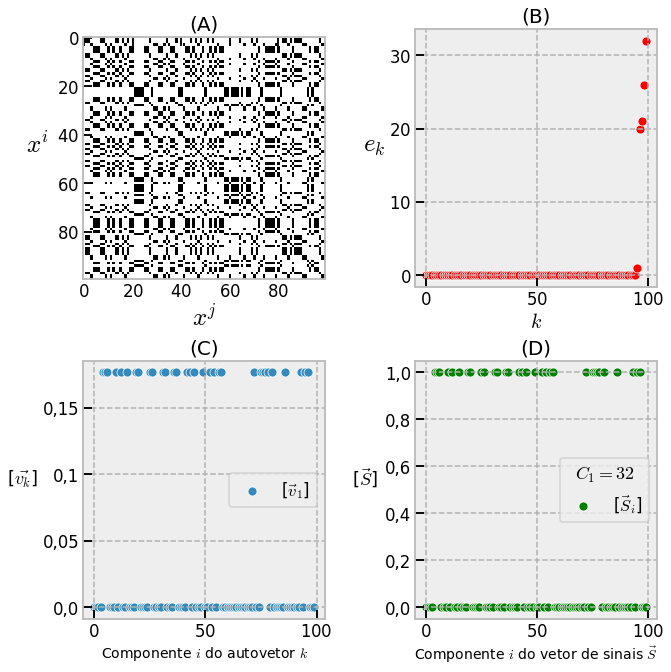

In [50]:
plot_Bivariate(nlcoupling_s000_r25, 1888, k_autovalores=1);

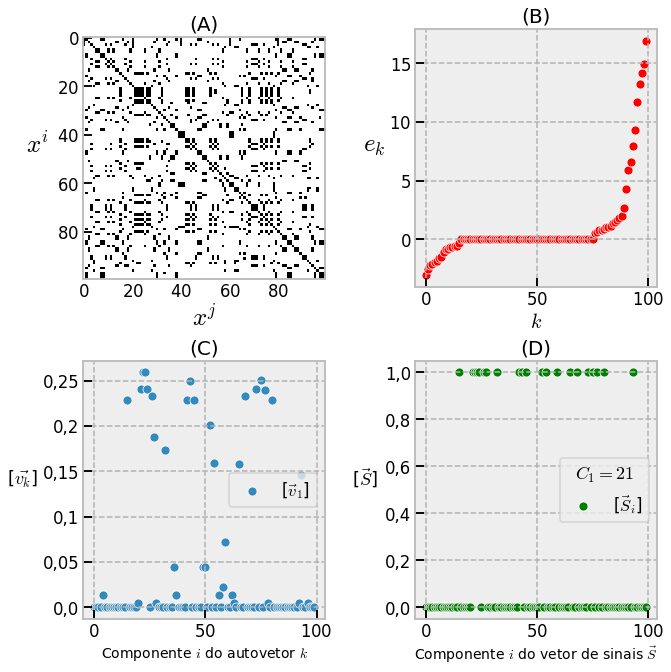

In [51]:
plot_Bivariate(nlcoupling_s020_r25, 1888, k_autovalores=1);

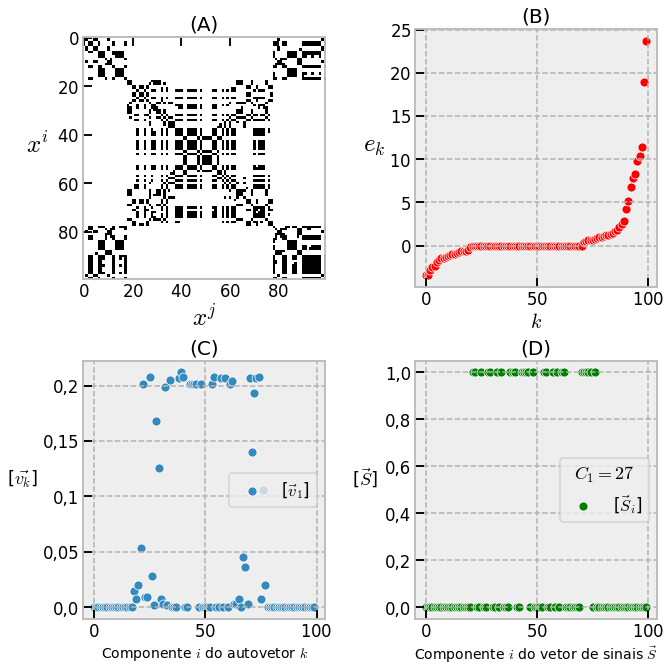

In [52]:
plot_Bivariate(nlcoupling_s0307_r25, 1888, k_autovalores=1);

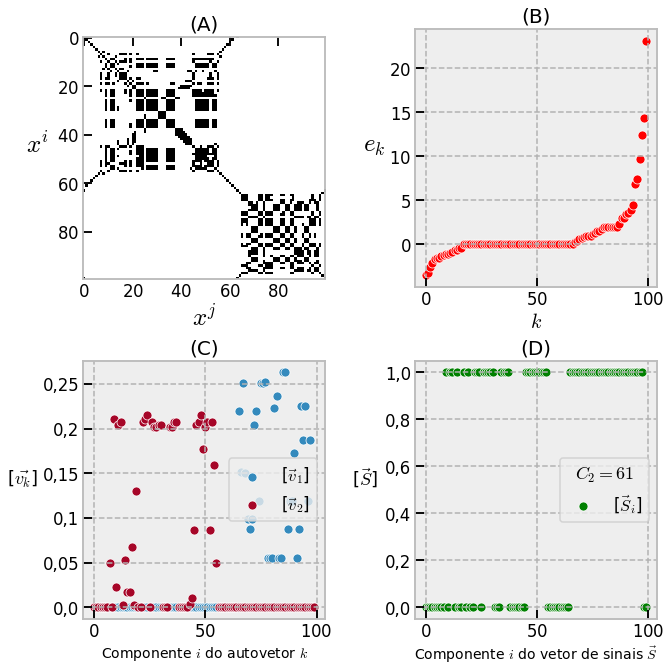

In [53]:
plot_Bivariate(nlcoupling_s040_r25, 1888, k_autovalores=2);

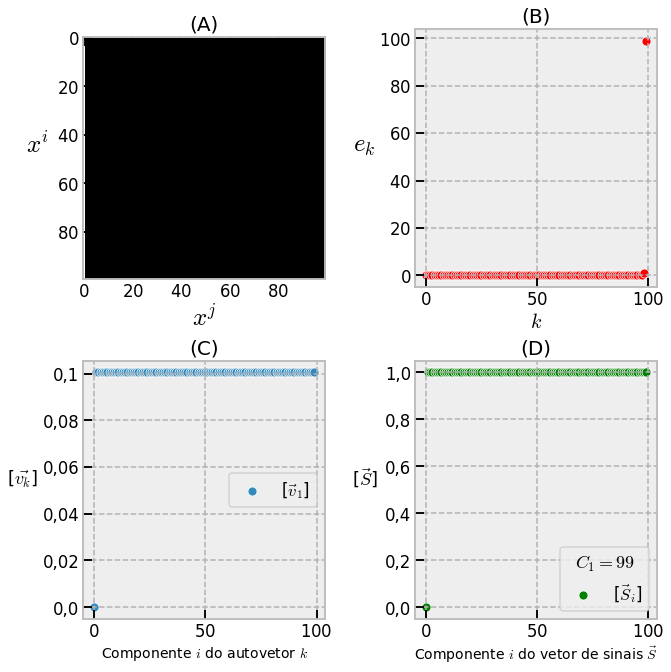

In [54]:
plot_Bivariate(nlcoupling_s057_r25, 1888, k_autovalores=1);

In [55]:
c_k = pd.DataFrame({})

In [56]:
#%%time

#for sigma in sigmas:
    #for raio in raios:
        #rede = NonlocalCouplingNetwork(condicoes_iniciais_apartir_rede, f, sigma=sigma, raio=raio, tempo = 20020, FORTRAN=True, EPS=0.05)
        #rede.exec_recurrence_spatial_analysis(ti_map=-112)

        #_,_, c = bivariate_analysis(rede.get_matrix_recurrences_spatial()[1], k_autovetores = 1, tolerancia = 0.05)
        #c_k.loc[f'{raio:.2f}', f'{sigma:.2f}'] = sum(c)
        
#with open('/content/gdrive/MyDrive/Classroom/TCC 2021 Conrado/codigos/espaco_parametros_C_k_linear_por_partes.pkl', 'wb') as file:
    #pickle.dump(c_k, file)

In [57]:
arq_c_k = open('/content/gdrive/MyDrive/Classroom/TCC 2021 Conrado/codigos/espaco_parametros_C_k_linear_por_partes.pkl', 'rb')
c_k = pickle.load(arq_c_k)

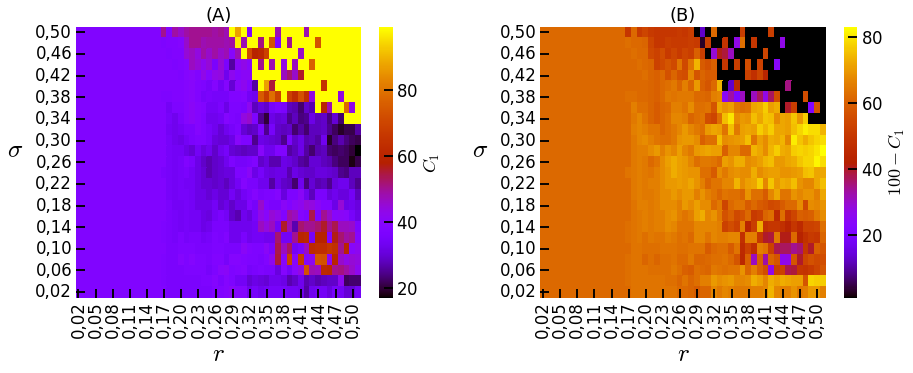

In [58]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(35*cm, 15*cm))
fig.tight_layout(pad=3.5)

c_k.columns = [str(i).replace('.',',') for i in c_k.columns]
c_k.index = [str(i).replace('.',',') for i in c_k.index]

g = sns.heatmap(data = c_k[::-1], cmap='gnuplot',
                cbar_kws={'label': '$C_1$'}, ax=ax[0])

ax[0].set_ylabel('$\sigma$', fontsize=25, labelpad=20, rotation=0)
ax[0].set_xlabel('$r$', fontsize=25)
ax[0].set_title('(A)')


g = sns.heatmap(data = 100-c_k[::-1], cmap='gnuplot',
                cbar_kws={'label': '$100 - C_1$'}, ax=ax[1])

ax[1].set_ylabel('$\sigma$', fontsize=25, labelpad=20, rotation=0)
ax[1].set_xlabel('$r$', fontsize=25)
ax[1].set_title('(B)')

fig;